# Graph-based image processing and analysis
**Master 2 GeoData Science**


## Introduction
The purpose of this lab is to experiment some graph-based tools for image processing that have been seen in Lecture (part 1). For this lab, we will work with the **Scikit-image** library.

Before starting, let mount your drive to allow Colab to acess to your Google Drive (for e.g., reading/writing images)

In [1]:
# Mount drive to allow Colab to access to your Google Drive
# from google.colab import drive
# drive.mount('/content/gdrive')


### **Exo 1: Compute the Adjacency matrix, Degree matrix and Laplacian Matrix from a given graph**

Read and show the *graph_exe.png* image from your Drive as follows:

Text(0.5, 1.0, 'A weighted graph')

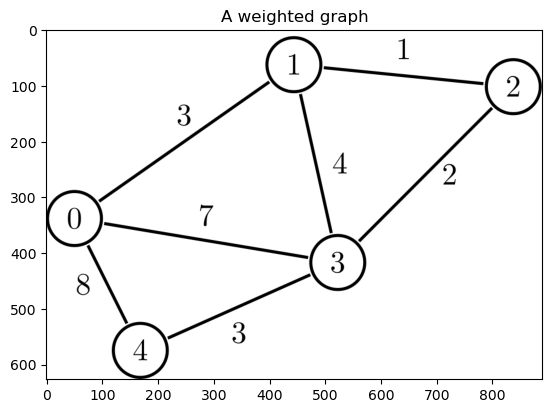

In [2]:
from skimage import io
import matplotlib.pyplot as plt

# img = io.imread('/content/gdrive/My Drive/Colab notebooks/img_graph/graph_exe.png')
img = io.imread(r'C:\Users\Ethel Ogallo\Documents\CDE\UBS\ERSIP\UBS_ERSIP\Labs\Data\graphdata\graph_exe.png')
plt.figure(0)
plt.imshow(img)
plt.title('A weighted graph')

1) Implement the adjacency matrix (W) using *numpy.array*




In [3]:
import numpy as np

W = np.array([[0, 3,0,7,8], 
             [3,0,1,4,0],
             [0,1,0,2,0],
             [7,4,2,0,3],
             [8,0,0,3,0]])

print(W)


[[0 3 0 7 8]
 [3 0 1 4 0]
 [0 1 0 2 0]
 [7 4 2 0 3]
 [8 0 0 3 0]]


2) Now compute the Degree matrix (D) and the Laplacian matrix (L) from W

In [4]:
# Degree matrix D

D = np.diag(np.sum(W, axis=1))

print(D)

[[18  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 11]]


In [5]:
# Laplacian matrix L

L = D- W

print(L)

[[18 -3  0 -7 -8]
 [-3  8 -1 -4  0]
 [ 0 -1  3 -2  0]
 [-7 -4 -2 16 -3]
 [-8  0  0 -3 11]]


### **Exo 2: Contruct a regular graph from an image**

Read and visualize the two following images
- img1: the *coffee* image from skimage data (need to import data package)
- img2: the *intersection94.jpg* image from your Drive


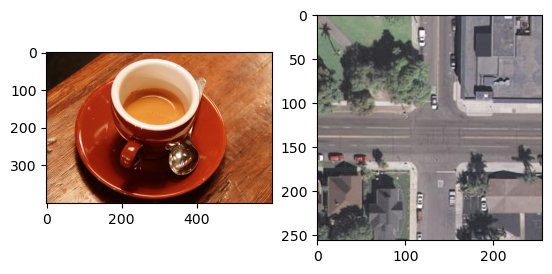

In [6]:
# Read img1 and img2
from skimage import data

img1 = data.coffee()

img2 = io.imread(r'C:\Users\Ethel Ogallo\Documents\CDE\UBS\ERSIP\UBS_ERSIP\Labs\Data\graphdata\intersection94.jpg')


# Show them side by side use subplot
plt.figure(0)

plt.subplot(1, 2, 1)
plt.imshow(img1)

plt.subplot(1, 2, 2)
plt.imshow(img2)



Now, imagine we would like to construct a regular graph (4-connected) on each of the images (named *G1* and *G2*)

1) What are the number of nodes? number of edges of a graph contructed from an image of size NxM ?


In [7]:
# your answer
# Nodes
# nodes = n*m

# Edges for 4-connectivity
# edges = n*(m-1) + m*(n-1)

# edges for 8-connectivity
# edges = 2*n*(m-1) + 2*m*(n-1)


2) Calculate the number of nodes and number of edges of G1 and G2.

In [8]:
# your answer

# Nodes
N1 = img1.shape[0] * img1.shape[1]
N2 = img2.shape[0] * img2.shape[1]


# Edges
E1 = img1.shape[0]*(img1.shape[1]-1) + img1.shape[1]*(img1.shape[0]-1)
E2 = img2.shape[0]*(img2.shape[1]-1) + img2.shape[1]*(img2.shape[0]-1)

print("G1: Nodes =", N1, ", Edges =", E1)
print("G2: Nodes =", N2, ", Edges =", E2)


G1: Nodes = 240000 , Edges = 479000
G2: Nodes = 65536 , Edges = 130560


### **Exo 3: Now we would like to construct a region adjacency graph (RAG) from superpixels. Let's follow the tutorial.**

1) Perform SLIC super-pixel segmentation using the *segmentation.slic* method with parameters
- compactness 20
- number of segments 400

Required packages: *segmentation, color*

In [9]:
# Generate super-pixels

from skimage import segmentation, color

# labels_sp1 from img1
labels_sp1 = segmentation.slic(img1, n_segments=400, compactness=20, start_label=1)

# labels_sp2 from img2
labels_sp2 = segmentation.slic(img2, n_segments=400, compactness=20, start_label=1)


Print the number of super-pixels from each one using *np.unique*


In [10]:
# Print the number of super-pixels
print("super-pixels in img1 =", len(np.unique(labels_sp1)))
print("super-pixels in img2 =", len(np.unique(labels_sp2)))


super-pixels in img1 = 395
super-pixels in img2 = 383


In [11]:
# Your remark





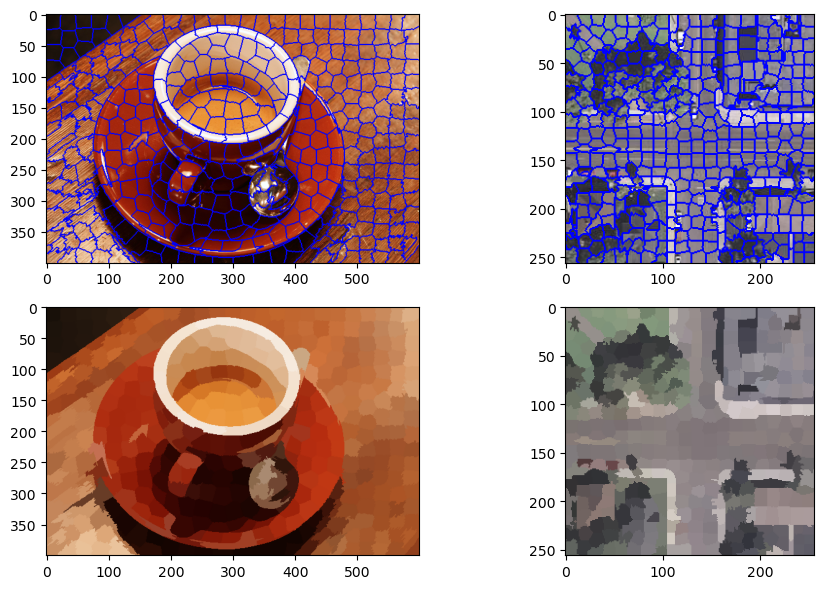

In [12]:
# visualize the super-pixels with *segmentation.mark_boundaries* and *color.label2rgb*

seg1 = segmentation.mark_boundaries(img1, labels_sp1,(0, 0, 1))
lbl1 = color.label2rgb(labels_sp1, image=img1, alpha=0.3, kind='avg')

seg2 = segmentation.mark_boundaries(img2, labels_sp2,(0, 0, 1))
lbl2 = color.label2rgb(labels_sp2, image=img2, alpha=0.3, kind='avg')

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(seg1)

plt.subplot(2, 2, 2)
plt.imshow(seg2)

# Row 2
plt.subplot(2, 2, 3)
plt.imshow(lbl1)

plt.subplot(2, 2, 4)
plt.imshow(lbl2)

plt.tight_layout()
plt.show()


2) Construct a RAG based on the super-pixels using the *graph.rag_mean_color* method

Required packages: *graph*

In [13]:
# Graph construction from super-pixels
from skimage import graph

rag1 = graph.rag_mean_color(img1, labels_sp1, mode='similarity')


rag2 = graph.rag_mean_color(img2, labels_sp2, mode='similarity')



Print the number of nodes and number of edges from each graph. Your remarks?

In [14]:
# Number of nodes
print("img1 nodes = ", len(rag1.nodes))
print("img2 nodes = ", len(rag2.nodes))

# Number of edges
print("img1 edges = ", len(rag1.edges))
print("img2 edges = ", len(rag2.edges))

img1 nodes =  395
img2 nodes =  383
img1 edges =  1110
img2 edges =  1097


In [15]:
# your remarks




3) Perform Graph-cut algorithm (Normalized Cut) from the constructed graph using the *graph.cut_normalized* method

In [20]:
# Perform graph-cut

labels_gcut1 = graph.cut_normalized(labels_sp1, rag1, thresh=0.1, num_cuts=10, in_place=True, max_edge=1.0,rng=None)

labels_gcut2 = graph.cut_normalized(labels_sp2, rag2, thresh=0.1, num_cuts=10, in_place=True, max_edge=1.0,rng=None)



Visualize the segmentation results

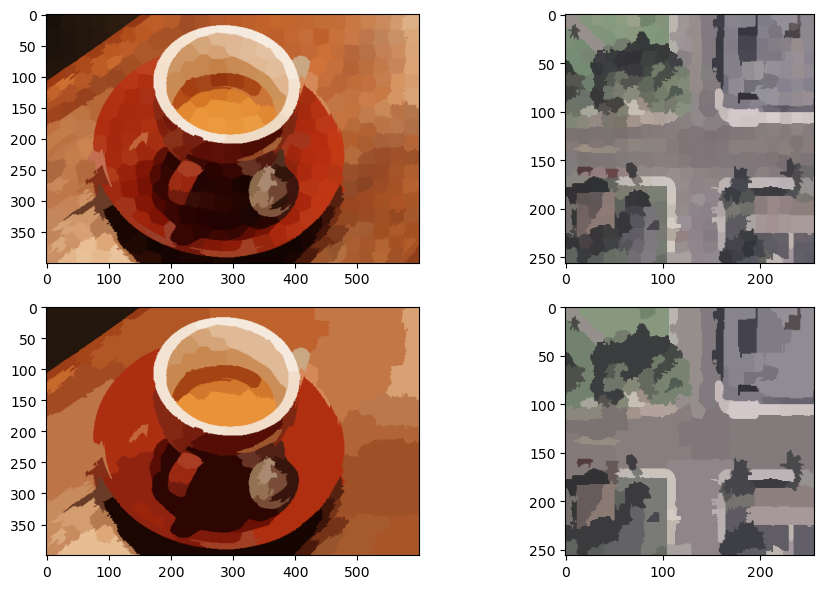

In [21]:
# visualization the graph results
plt.figure(figsize=(10, 6))

# Row 2
plt.subplot(2, 2, 1)
plt.imshow(lbl1)

plt.subplot(2, 2, 2)
plt.imshow(lbl2)

gcut1 = color.label2rgb(labels_gcut1, image=img1, kind='avg')
plt.subplot(2, 2, 3)
plt.imshow(gcut1)

cut2 = color.label2rgb(labels_gcut2, image=img2, kind='avg')
plt.subplot(2, 2, 4)
plt.imshow(cut2)

plt.tight_layout()
plt.show()


What are the number of segments from each segmented image?


In [18]:
# your response



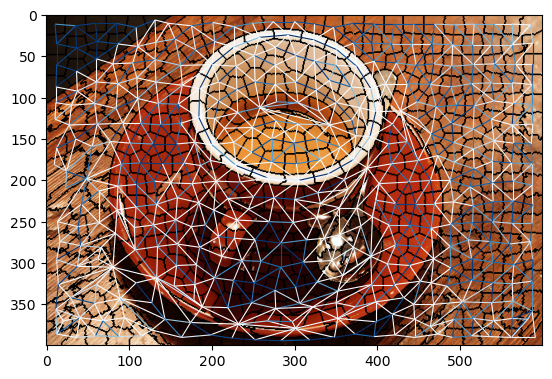

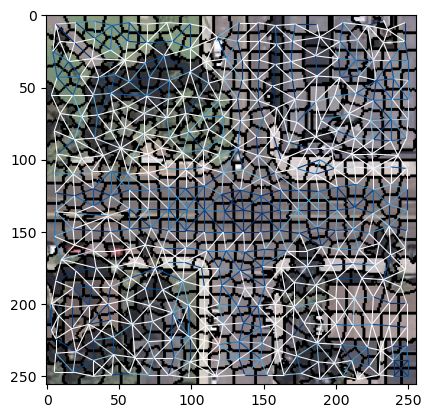

In [19]:
g1 = graph.show_rag(labels_sp1, rag1, img1, border_color='black', edge_width=0.8, edge_cmap='Blues', img_cmap=None, in_place=True, ax=None)
g2 = graph.show_rag(labels_sp2, rag2, img2, border_color='black', edge_width=0.8, edge_cmap='Blues', img_cmap=None, in_place=True, ax=None)